In [8]:
from PIL import Image

In [9]:
path = 'animal_images/パンダ/000002.jpg'
img = Image.open(path)
# img

In [10]:
from torchvision import transforms, datasets

In [11]:
imsize = 256
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [12]:
dataset = datasets.ImageFolder('animal_images', transform)
dataset

Dataset ImageFolder
    Number of datapoints: 120
    Root location: animal_images
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [13]:
len(dataset)

120

3

In [14]:
dataset[0][0].shape

torch.Size([3, 128, 128])

In [15]:
type(dataset[0][0])

torch.Tensor

In [16]:
import matplotlib.pyplot as plt

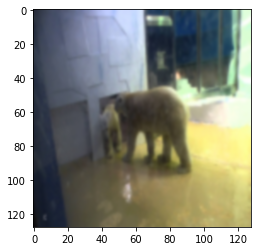

In [17]:
plt.imshow(transforms.ToPILImage()(dataset[119][0]), interpolation="bicubic")

In [18]:
for i in range(120):
    print('{}, {}'.format(dataset[i][0].shape, dataset[i][1]))


torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 0
torch.Size([3, 128, 128]), 1
torch.Size([3, 128, 128]), 1
torch.Size([3, 128, 128]), 1
torch.Size([3, 128, 128]), 1
torch.Size([3,

In [19]:
n_train = int(len(dataset) * 0.7)
n_val = len(dataset) - n_train 

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

In [21]:
train, val = torch.utils.data.random_split(dataset, [n_train, n_val])

In [22]:
import torch.nn as nn
import torch.nn.functional as F

import pytorch_lightning as pl
from pytorch_lightning import Trainer

In [23]:
from cnn_model import Net

In [24]:
# class TrainNet(pl.LightningModule):
  
#   # def train_dataloader(self):
#   #   return torch.utils.data.DataLoader(train, self.batch_size, shuffle=True, num_workers=self.num_workers)

#   def training_step(self, batch, batch_idx):
#     x, t = batch
#     y = self.forward(x)
#     loss = self.lossfun(y, t)
#     results = {'loss': loss}
#     return results

In [25]:
# class ValidationNet(pl.LightningModule):

# #   @pl.data_loader
# #   def val_dataloader(self):
# #     return torch.utils.data.DataLoader(val, self.batch_size, num_workers=self.num_workers)

#   def validation_step(self, batch, batch_idx):
#     x, t = batch
#     y = self.forward(x)
#     loss = self.lossfun(y, t)
#     y_label = torch.argmax(y, dim=1)
#     acc = torch.sum(t == y_label) * 1.0 / len(t)
#     results = {'val_loss': loss, 'val_acc': acc}
#     return results

#   def validation_end(self, outputs):
#     avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
#     avg_acc = torch.stack([x['val_acc'] for x in outputs]).mean()
#     results = {'val_loss': avg_loss, 'val_acc': avg_acc}
#     return results

In [26]:
# class Net(TrainNet, ValidationNet):

#   def __init__(self):
#     super().__init__()

#     # # バッチサイズ
#     # self.batch_size = batch_size

#     # 画像解像度　torch.Size([3, 128, 128])
#     self.conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1) # (128 + 2 - 3 / 1) + 1 = 128
#     self.pool = nn.MaxPool2d(2, 2) # (128 - 2 / 2) + 1 = 64
#     self.bn = nn.BatchNorm1d(3 * 64 * 64)  # 64 * 64 ピクセルの画像、特徴マップ3枚
#     self.fc1 = nn.Linear(3 * 64 * 64, 100)
#     self.fc2 = nn.Linear(100, 4)


#   def lossfun(self, y, t):
#     return F.cross_entropy(y, t)

#   def configure_optimizers(self):
#     return torch.optim.Adam(self.parameters(), lr=0.01,  weight_decay=0.001)

#   def forward(self, x):
#     x = self.conv(x)
#     x = F.relu(x)
#     x = self.pool(x)

#     x = x.view(x.size(0), -1)
#     x = self.bn(x)
#     x = self.fc1(x)
#     x = F.relu(x)
#     x = self.fc2(x)
#     return x

In [27]:
# https://pytorch-lightning.readthedocs.io/en/stable/lightning-module.html#minimal-example

In [28]:
len(train), len(val)

(84, 36)

In [29]:
# バッチサイズ
batch_size = 32
num_workers = 0

train_loader = torch.utils.data.DataLoader(train, batch_size, num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size, num_workers=num_workers)

trainer = pl.Trainer(max_epochs=10)
model = Net()

trainer.fit(model, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name | Type        | Params
-------------------------------------
0 | conv | Conv2d      | 84    
1 | pool | MaxPool2d   | 0     
2 | bn   | BatchNorm1d | 24 K  
3 | fc1  | Linear      | 1 M   
4 | fc2  | Linear      | 404   
Epoch 0:  60%|██████    | 3/5 [00:03<00:02,  1.06s/it, loss=4.066, v_num=8]
Validating: 0it [00:00, ?it/s]
Epoch 1:  60%|██████    | 3/5 [00:03<00:02,  1.31s/it, loss=3.698, v_num=8]
Validating: 0it [00:00, ?it/s]
Epoch 2:  60%|██████    | 3/5 [00:03<00:02,  1.15s/it, loss=2.953, v_num=8]
Validating: 0it [00:00, ?it/s]
Epoch 3:  60%|██████    | 3/5 [00:03<00:02,  1.11s/it, loss=2.708, v_num=8]
Validating: 0it [00:00, ?it/s]
Epoch 4:  60%|██████    | 3/5 [00:03<00:02,  1.14s/it, loss=2.181, v_num=8]
Validating: 0it [00:00, ?it/s]
Epoch 5:  60%|██████    | 3/5 [00:03<00:02,  1.18s/it, loss=1.919, v_num=8]
Validating: 0it [00:00, ?it/s]
Epoch 6:  60%|██████    | 3/5 [00:03<00:02,  1.25s/i

1

In [30]:
trainer.callback_metrics

{'val_loss': tensor(4.4589),
 'val_acc': tensor(0.6406),
 'loss': tensor(3.7431e-06)}

## 確認してみる

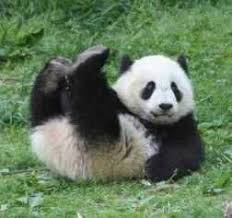

In [31]:
path = 'index.jpg'
img2 = Image.open(path)
img2

In [32]:
type(img2)

PIL.JpegImagePlugin.JpegImageFile

In [33]:
mt = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
    ])

In [34]:
img3 = mt(img2)

In [35]:
type(img3)

torch.Tensor

In [36]:
img3.shape

torch.Size([3, 128, 128])

In [37]:
img3.unsqueeze(0).shape

torch.Size([1, 3, 128, 128])

In [38]:
type(img3.unsqueeze(0))

torch.Tensor

In [39]:
model.eval()
model.freeze()

# F.softmax(fine_net(x)), val[0][1]
ret = F.softmax(model(img3.unsqueeze(0)))
print(ret)
ret.argmax()


tensor([[7.6609e-08, 9.9939e-01, 5.3815e-04, 7.0061e-05]])


tensor(1)

In [40]:
ret = F.softmax(model(dataset[60][0].unsqueeze(0)))
print(ret)
ret.argmax(), dataset[60][1]

tensor([[7.2277e-23, 7.7591e-22, 1.0000e+00, 5.9048e-09]])


(tensor(2), 2)

tensor([[[0.8235, 0.8235, 0.8235,  ..., 0.9608, 0.9529, 0.9216],
         [0.8392, 0.8314, 0.8314,  ..., 0.9765, 0.9804, 0.9804],
         [0.8471, 0.8392, 0.8353,  ..., 0.9882, 0.9922, 0.9922],
         ...,
         [0.5804, 0.5922, 0.6078,  ..., 0.4510, 0.5098, 0.5294],
         [0.5647, 0.5765, 0.5804,  ..., 0.4863, 0.5255, 0.5176],
         [0.5608, 0.5647, 0.5529,  ..., 0.4745, 0.5294, 0.5059]],

        [[0.8235, 0.8235, 0.8235,  ..., 0.9451, 0.9412, 0.8980],
         [0.8392, 0.8314, 0.8314,  ..., 0.9725, 0.9804, 0.9765],
         [0.8471, 0.8392, 0.8353,  ..., 0.9843, 0.9922, 0.9922],
         ...,
         [0.5961, 0.6078, 0.6157,  ..., 0.4431, 0.4941, 0.5216],
         [0.5804, 0.5922, 0.5961,  ..., 0.4745, 0.5098, 0.5020],
         [0.5804, 0.5843, 0.5765,  ..., 0.4588, 0.5137, 0.4941]],

        [[0.8235, 0.8235, 0.8235,  ..., 0.9412, 0.9333, 0.8706],
         [0.8392, 0.8314, 0.8314,  ..., 0.9725, 0.9765, 0.9686],
         [0.8471, 0.8392, 0.8353,  ..., 0.9843, 0.9922, 0.

## 保存

In [41]:
import pickle

In [42]:
file = 'trained_model.pkl'
pickle.dump(model, open(file, 'wb'))

In [43]:
torch.save(model.to('cpu').state_dict(), 'trained.pth')